# Demo Notebook

This notebook aims to represent the DeepLabCut output analysis, using example data. 
So we begin by importing our packages, called for now "dlc". 

In [1]:
import dlc

#### Loading data
As an example, we will first work on a single file. Later, we'll try batch processing. We define the path where our file is, and with the function
`dlc.load_data.read_data` we will load our `.h5` file. 

In [2]:
h5_path =  '/Users/annateruel/ca2+img-anna-2023-01-30/videos'
data = dlc.load_data.read_data( '/Users/annateruel/ca2+img-anna-2023-01-30/videos/0_neutro2DLC_resnet50_ca2+imgJan30shuffle1_500000.h5', 5, 30)

Since on this data file we have performed a tracking on the cage, we will define a list of bodyparts we want to work with. 

In [3]:
bodyparts = ['nose', 'rightear', 'leftear', 'head', 'sp1', 'sp2', 'tail']

In [13]:
df2 = data.copy()

#### Get centroid from a list of bodyparts

One of the functions we can perform from the `data.py` file is to calculate the centroid of specified bodyparts in each dataframe. We can add this centroid coordinates (x,y) to our current dataframe. Let's try that!

#### Calculate interpolation

If the tracking of some bodyparts is not perfect, we can get the interpolation of those values with likelihood under a certain threshold. 

In [ ]:
df2 = data.copy() #we get a copy of the dataframe and work from there
df2 = dlc.data.get_interpolation()

In [ ]:
DLCscorer = df2.columns[0][0]
threshold = 0.95
likelihood_col = (DLCscorer, 'nose', 'likelihood')
if df2[likelihood_col].lt(threshold).any():
    mask = df2[likelihood_col] < threshold

    df2.loc[mask, (DLCscorer, 'nose', 'x')] = np.nan
    df2.loc[mask, (DLCscorer, 'nose', 'y')] = np.nan

    df2[(DLCscorer, 'nose', 'x')] = df2[(DLCscorer, 'nose', 'x')].interpolate(method='linear')
    df2[(DLCscorer, 'nose', 'y')] = df2[(DLCscorer, 'nose', 'y')].interpolate(method='linear')

nose2 = df2.loc[:,(DLCscorer, 'nose', slice(None))]
nose2

In [3]:
nose = data.loc[:, (slice(None), 'nose', slice(None))]
nose.loc[:,(slice(None), slice(None), 'x')]

scorer,DLC_resnet50_ca2+imgJan30shuffle1_500000
bodyparts,nose
coords,x
0,527.124634
1,526.650269
2,527.668457
3,527.806580
4,527.867065
...,...
995,304.320038
996,304.502136


/Users/annateruel/phd_code/dlc/plotting.py:81: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(


NameError: name 'plt' is not defined

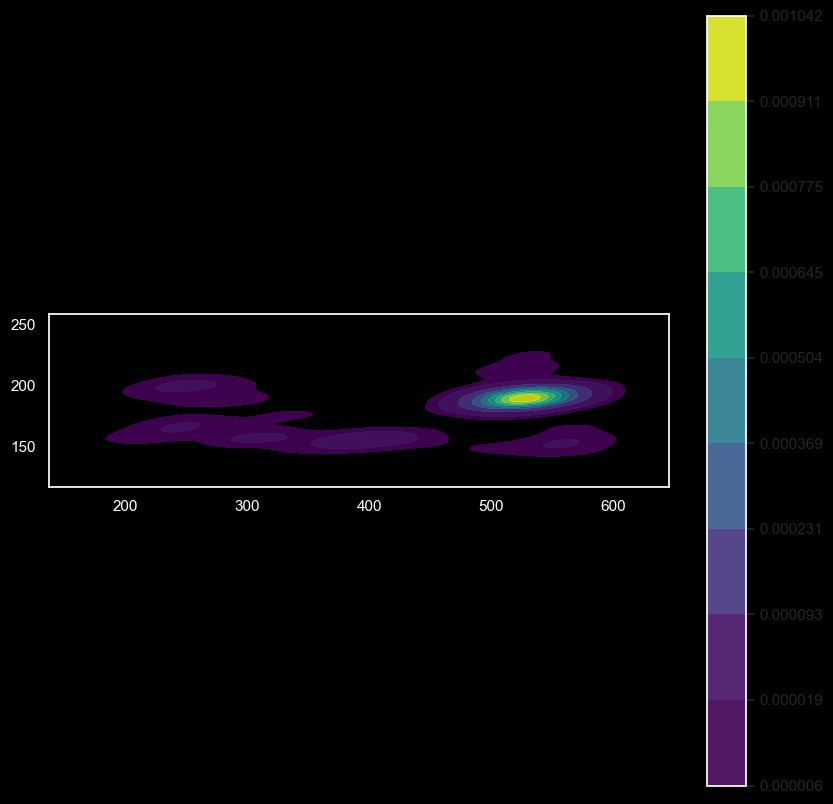

In [5]:
dlc.plotting.density_plot(bodypart=nose, style='dark')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

fig, ax = plt.subplots(figsize=(10, 10))

x = nose.loc[:, (slice(None), slice(None), 'x')].values
y = nose.loc[:, (slice(None), slice(None), 'y')].values
likelihood = nose.loc[:, (slice(None), slice(None), 'likelihood')].values.flatten()  # Flatten the array

# Create segments for LineCollection
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a LineCollection object with segments and colormap
colormap = plt.cm.RdYlGn
lc = LineCollection(segments, cmap=colormap, norm=plt.Normalize(likelihood.min(), likelihood.max()), linewidth=0.5, alpha=0.5)
lc.set_array(likelihood)

ax.add_collection(lc)

# Add a colorbar to the plot to show what each color represents
cbar = plt.colorbar(lc, ax=ax)
cbar.set_label('Likelihood Value')

ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def plot_data(ax, data, title):
    x = data.loc[:, (slice(None), slice(None), 'x')].values
    y = data.loc[:, (slice(None), slice(None), 'y')].values
    likelihood = data.loc[:, (slice(None), slice(None), 'likelihood')].values.flatten()

    # Create segments for LineCollection
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection object with segments and colormap
    colormap = plt.cm.RdYlGn
    lc = LineCollection(segments, cmap=colormap, norm=plt.Normalize(likelihood.min(), likelihood.max()), linewidth=0.5, alpha=0.5)
    lc.set_array(likelihood)

    ax.add_collection(lc)
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_title(title)
    
    return lc

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

lc1 = plot_data(ax1, nose, "Before Interpolation")
lc2 = plot_data(ax2, nose2, "After Interpolation")

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(lc2, cax=cbar_ax)
cbar.set_label('Likelihood Value')

plt.tight_layout()
plt.show()


In [14]:
nose = dlc.data.get_interpolation(df2, bodyparts)

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
lc1 = plot_data(ax1, nose, "Before Interpolation")
lc2 = plot_data(ax2, nose2, "After Interpolation")

In [7]:
from dlc.analysis.time_roi import ROIDrawer
import pandas as pd

In [9]:
video_path = '/Users/annateruel/Desktop/0_test.avi'
out_dir = '/Users/annateruel/coord_poly.h5'
roi_drawer = ROIDrawer(video_path, save_dir = out_dir, num_rois=2)
r = roi_drawer.draw_rois()
r

Button clicked, processing ROIs...
ROI DataFrame assigned:    index shape-type  vertex-index      axis-0      axis-1
0      0     direct             0  133.240947  125.909605
1      0     direct             1  133.240947  300.269954
2      0     direct             2  471.902394  309.490934
3      0     direct             3  464.357956  102.857155
ROI DataFrame saved to: /Users/annateruel/coord_poly.h5


In [6]:
r = pd.read_hdf('/Users/annateruel/coord_poly.h5')
r

,index,shape-type,vertex-index,axis-0,axis-1
0,0,add_ellipse,0,118.413496,154.689339
1,0,add_ellipse,1,118.413496,278.667848
2,0,add_ellipse,2,234.845488,278.667848
3,0,add_ellipse,3,234.845488,154.689339
4,1,add_ellipse,0,340.496739,129.893637
5,1,add_ellipse,1,340.496739,279.745922
6,1,add_ellipse,2,460.162952,279.745922
7,1,add_ellipse,3,460.162952,129.893637


In [ ]:
# Example usage:
time_in_roi = TimeInROI()
time_in_roi.add_roi('ellipse', ((1, 1), (1, 2)))
print(time_in_roi.is_point_inside_roi((1, 2), 0))  # True for ellipse

time_in_roi.add_roi('polygon', [(0, 0), (0, 2), (2, 2), (2, 0)])
print(time_in_roi.is_point_inside_roi((1, 1), 1))  # True for polygon

time_in_roi.add_roi('rectangle', [(0, 0), (2, 2)])
print(time_in_roi.is_point_inside_roi((1, 1), 2))  # True for rectangle


## TRIALS

Testing some functions here: 

In [1]:
import dlc

In [2]:
bodyparts = ['nose', 'rightear', 'leftear', 'head']
file_path = '/Users/annateruel/ca2+img-anna-2023-01-30/videos/0_neutro2DLC_resnet50_ca2+imgJan30shuffle1_500000.h5'
title = 'Demo Plot'

In [5]:
tracking_plotter = dlc.plotting.TrackingPlot(style='dark')


/Users/annateruel/phd_code/dlc/data.py:28: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  centroid_x = df.loc[:, (slice(None), x_columns, 'x')].mean(axis=1)
/Users/annateruel/phd_code/dlc/data.py:29: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  centroid_y = df.loc[:, (slice(None), y_columns, 'y')].mean(axis=1)


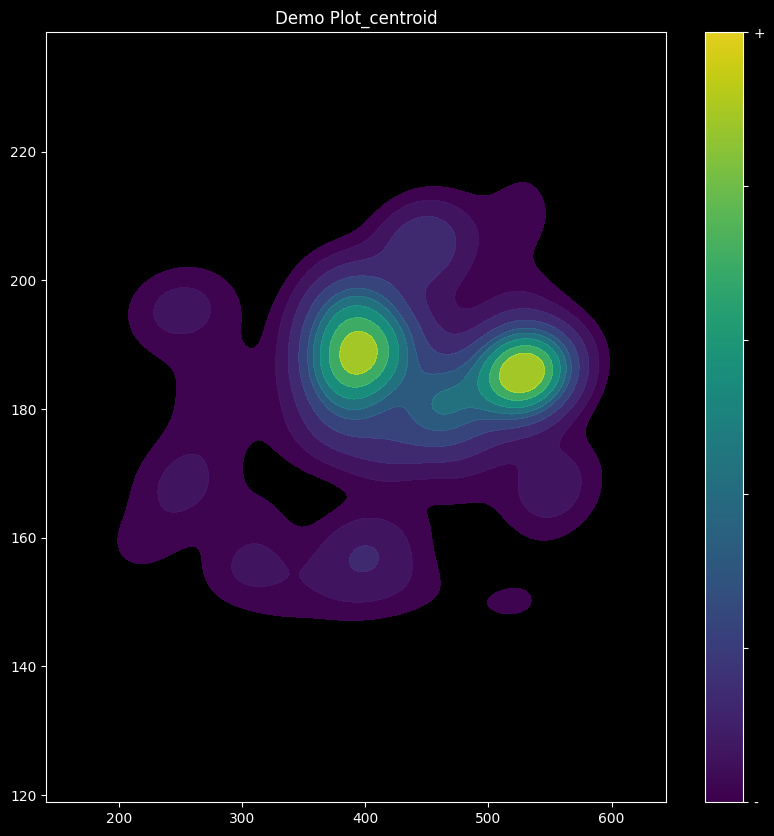

In [6]:
tracking_plotter.plot_file(file_path, bodyparts, title, plot_type="density")


In [3]:
# Create an instance of the Centroid class
centroid_calculator = dlc.data.Centroid()  # Add any necessary arguments if required

# Now use this instance to call get_centroid
data = centroid_calculator.get_centroid(
    input_data='/Users/annateruel/ca2+img-anna-2023-01-30/videos/0_neutro2DLC_resnet50_ca2+imgJan30shuffle1_500000.h5', 
    bodyparts=['nose', 'rightear', 'leftear', 'head']
)
data


/Users/annateruel/phd_code/dlc/data.py:48: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  centroid_x = centroid_x.append(pd.Series(x_coords.mean()))
/Users/annateruel/phd_code/dlc/data.py:49: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  centroid_y = centroid_y.append(pd.Series(y_coords.mean()))
/Users/annateruel/phd_code/dlc/data.py:48: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  centroid_x = centroid_x.append(pd.Series(x_coords.mean()))
/Users/annateruel/phd_code/dlc/data.py:49: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  centroid_y = centroid_y.append(pd.Series(y_coords.mean()))
/Users/annateruel/phd_code/dlc/data.py:48: Futur

scorer    DLC_resnet50_ca2+imgJan30shuffle1_500000                         \
bodyparts                                     nose                          
coords                                           x           y likelihood   
0                                       527.124634  187.436584   0.713343   
1                                       526.650269  187.423416   0.483304   
2                                       527.668457  187.108887   0.562767   
3                                       527.806580  187.087570   0.636567   
4                                       527.867065  187.660934   0.593895   
..                                             ...         ...        ...   
995                                     304.320038  155.900208   0.640382   
996                                     304.502136  155.934494   0.781225   
997                                     255.933182  203.581604   0.881650   
998                                     253.350449  209.354492   0.676185   
999                                     298.750793  155.122330   0.651955   

scorer                                                                \
bodyparts       riear                              leear               
coords              x           y likelihood           x           y   
0          531.241150  181.202728   0.037449  533.313538  186.848221   
1          395.159302  174.295761   0.039792  533.545288  186.951660   
2          531.451172  179.995941   0.091725  534.045227  186.751480   
3          394.557251  174.194717   0.105455  534.276001  186.826462   
4          389.740784  166.660141   0.060187  534.148743  186.971664   
..                ...         ...        ...         ...         ...   
995        296.419800  165.977249   0.997347  286.204620  157.384598   
996        296.353241  165.709290   0.997172  285.541168  157.470459   
997        258.952362  182.463043   0.999039  271.849976  191.004883   
998        255.945709  183.715118   0.999598  270.198761  194.456589   
999        256.864044  184.401199   0.999635  269.118561  195.006195   

scorer                            ...                                     \
bodyparts                   head  ...          rt                     cd   
coords    likelihood           x  ...           y likelihood           x   
0           0.547594  529.480774  ...  189.647034   0.999552  616.570312   
1           0.592051  398.246216  ...  188.925415   0.999737  617.613708   
2           0.726811  530.369568  ...  190.143463   0.999674  616.508789   
3           0.682640  397.214813  ...  189.048203   0.999548  617.500610   
4           0.644099  397.952484  ...  187.900406   0.999813  617.328369   
..               ...         ...  ...         ...        ...         ...   
995         0.993927  298.103119  ...  189.719513   0.999867  617.372437   
996         0.993588  297.815613  ...  189.574509   0.999829  617.395874   
997         0.994358  298.203583  ...  188.455017   0.999871  617.319946   
998         0.999753  295.869568  ...  189.331940   0.999712  617.355286   
999         0.999842  256.867065  ...  188.977005   0.999665  617.465027   

scorer                                                               \
bodyparts                                 rd                          
coords              y likelihood           x           y likelihood   
0          190.984070   0.028949  657.202515  197.643997   0.068149   
1          191.437622   0.021160  657.346191  195.722488   0.018528   
2          190.900192   0.028970  657.202637  198.047577   0.021821   
3          191.391159   0.031444  657.318848  197.606293   0.051521   
4          191.438263   0.037785  657.622864  197.025177   0.023748   
..                ...        ...         ...         ...        ...   
995        191.607758   0.023653  656.964539  197.635803   0.032904   
996        191.542770   0.023629  657.504395  197.645187   0.012940   
997        191.296417   0.037580  657.103638  197.229294   0.05456

In [4]:
centroid_df = data.loc[:, (slice(None), 'centroid', slice(None))]
centroid_df

scorer    DLC_resnet50_ca2+imgJan30shuffle1_500000            
bodyparts                                 centroid            
coords                                           x           y
0                                       448.893127  177.096912
1                                       454.181558  176.807987
2                                       447.742629  177.511627
3                                       426.392731  176.984001
4                                       427.334428  175.592984
..                                             ...         ...
995                                     360.963090  176.680357
996                                     360.601599  176.655592
997                                     354.732625  183.143606
998                                     353.256927  183.980723
999                                     353.392573  183.394785

[1000 rows x 2 columns]

In [5]:
x = centroid_df.loc[:, (slice(None), slice(None), 'x')].values.flatten()
x

array([448.89312744, 454.18155846, 447.74262883, 426.39273071,
       427.33442805, 427.22906964, 416.37188251, 416.64885536,
       417.04568247, 432.2058751 , 430.16304838, 431.53865051,
       429.63691829, 431.6812615 , 429.68778405, 429.67455585,
       420.16812134, 429.6128317 , 418.59552354, 438.649873  ,
       429.65888273, 427.43282259, 437.71792133, 428.24708675,
       428.82722238, 428.91995591, 430.19088276, 430.00153879,
       431.53001052, 430.65343886, 432.58239394, 438.01583862,
       448.25586055, 438.06625484, 438.44054237, 427.26109431,
       428.33758075, 427.83937073, 438.21319228, 458.83049833,
       458.55529433, 458.72880789, 458.71782743, 458.62995441,
       437.85483727, 438.1904203 , 438.6078456 , 438.3268104 ,
       438.08296908, 438.32258958, 427.49913377, 427.73962402,
       438.03108333, 438.50727609, 438.29977182, 428.11359699,
       438.12397062, 427.28024761, 427.45626596, 428.17135737,
       427.84604938, 427.15142588, 427.77179425, 427.04

In [6]:
import matplotlib.pyplot as plt

def line_plot(bodypart, title, color='red'):
        """
        Generate a line plot for the provided data points.

        Args:
            bodypart (pandas.DataFrame): A dataframe containing columns 'x' and 'y'.
            title (str): Title for the plot.
            color (str, optional): Color of the line plot. Defaults to 'red'.

        Returns:
            None: Saves the plot as a PDF file.
        """        
        plt.figure(figsize=(10, 10))

        x = bodypart.loc[:, (slice(None), slice(None), 'x')].values.flatten()
        y = bodypart.loc[:, (slice(None), slice(None), 'y')].values.flatten()

        plt.plot(x, y, marker='o', markersize=2, linestyle='-', color=color)
        plt.title(title)
        plt.show()

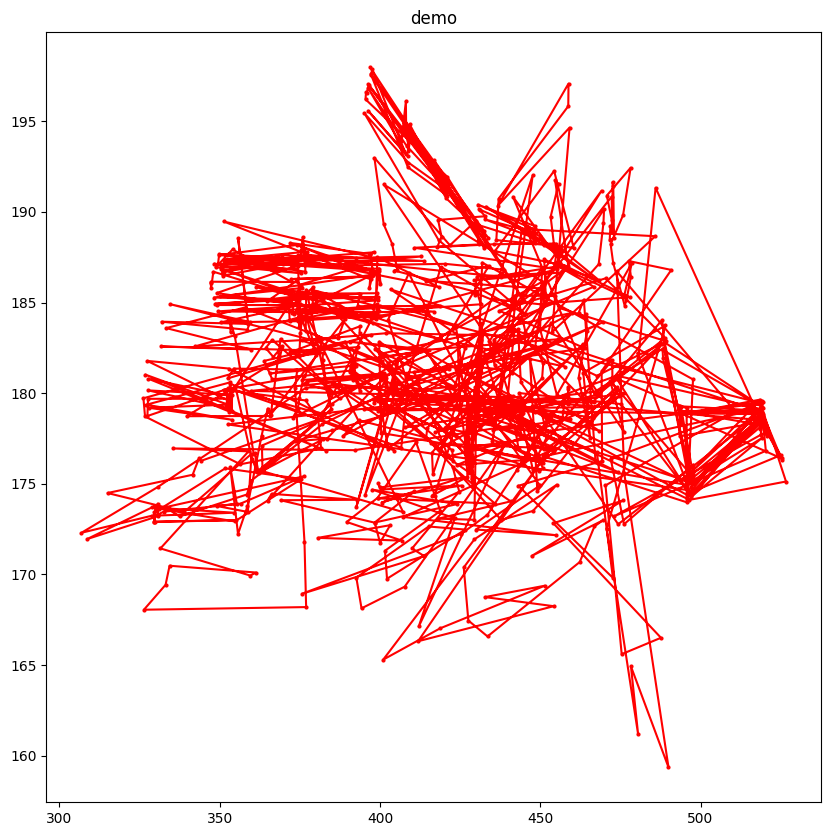

In [7]:
line_plot(centroid_df, 'demo')

In [9]:
import pandas as pd
d = pd.read_hdf(file_path)

In [12]:
x_columns = [bp for bp in bodyparts]
y_columns = [bp for bp in bodyparts]
y_columns

['nose', 'rightear', 'leftear', 'head']

In [18]:
import numpy as np
centroid_x = (d.loc[:, (slice(None), x_columns, 'x')].mean(axis=1))
centroid_x

/var/folders/q4/d9bmvghd77x_l961kcngf8_c0000gn/T/ipykernel_11089/3918191895.py:2: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  centroid_x = (d.loc[:, (slice(None), x_columns, 'x')].mean(axis=1))


0      528.302704
1      462.448242
2      529.019012
3      462.510696
4      462.909775
          ...    
995    301.211578
996    301.158875
997    277.068382
998    274.610008
999    277.808929
Length: 1000, dtype: float64